In [3]:
import tensorflow as tf
import numpy as np
import scipy
import cv2
import os 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import keras

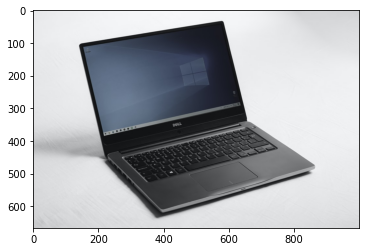

In [4]:
img = image.load_img("single image path here")
plt.imshow(img)

In [5]:
cv2.imread("single image path here").shape

(667, 1000, 3)

In [6]:
cv2.imread("imagedata/training/laptop/1.jpg")

array([[[234, 232, 231],
        [234, 232, 231],
        [234, 232, 231],
        ...,
        [210, 208, 207],
        [210, 208, 207],
        [210, 208, 207]],

       [[234, 232, 231],
        [234, 232, 231],
        [234, 232, 231],
        ...,
        [211, 209, 208],
        [211, 209, 208],
        [211, 209, 208]],

       [[234, 232, 231],
        [234, 232, 231],
        [234, 232, 231],
        ...,
        [211, 209, 208],
        [211, 209, 208],
        [211, 209, 208]],

       ...,

       [[204, 202, 201],
        [204, 202, 201],
        [203, 201, 200],
        ...,
        [218, 216, 215],
        [218, 216, 215],
        [219, 217, 216]],

       [[204, 202, 201],
        [204, 202, 201],
        [203, 201, 200],
        ...,
        [217, 215, 214],
        [218, 216, 215],
        [218, 216, 215]],

       [[204, 202, 201],
        [204, 202, 201],
        [203, 201, 200],
        ...,
        [217, 215, 214],
        [217, 215, 214],
        [216, 214, 213]]

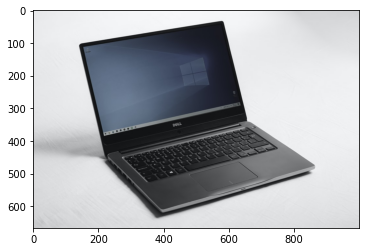

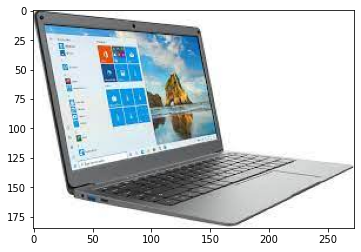

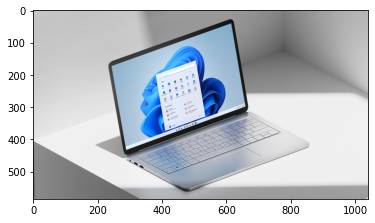

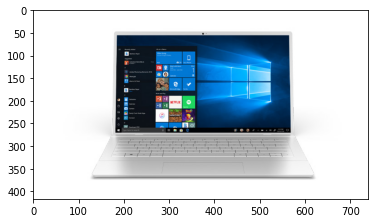

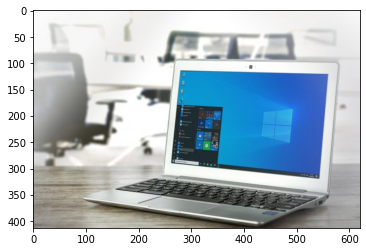

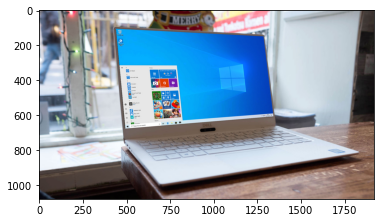

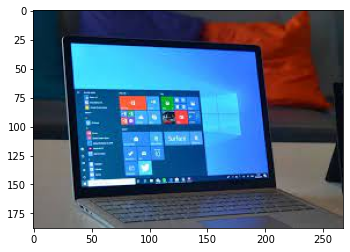

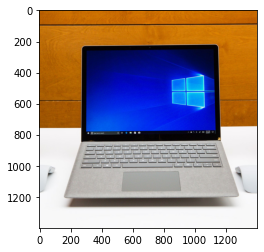

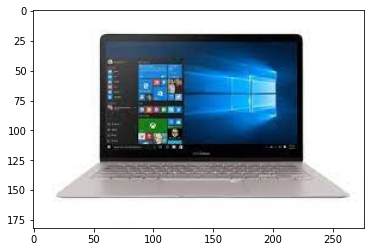

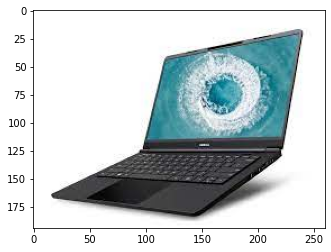

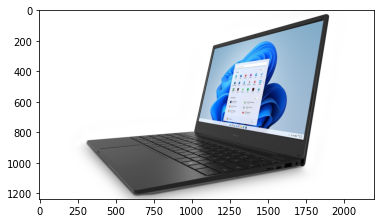

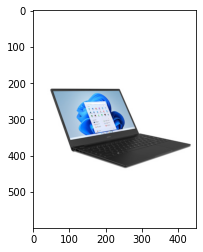

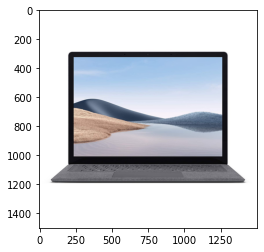

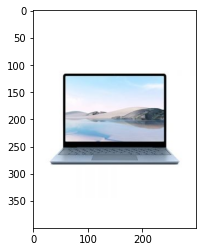

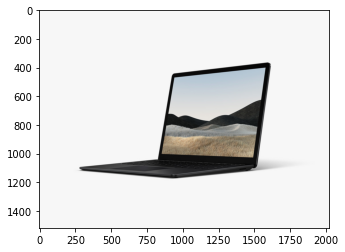

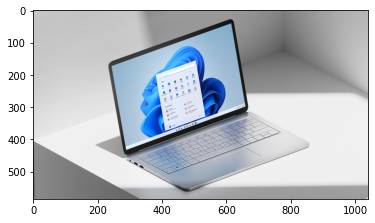

In [7]:
dir_path = "directory(folder) path here"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+i)
    plt.imshow(img)
    plt.show()

In [8]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [9]:
traning_dataset = train.flow_from_directory('dir path',target_size=(200,200),batch_size=3,
                                         class_mode='binary')

validation_dataset = validation.flow_from_directory('dir path',target_size=(200,200),batch_size=3,
                                         class_mode='binary')

Found 31 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [10]:
traning_dataset.class_indices

{'laptop': 0, 'mobile': 1}

In [11]:
traning_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [13]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.01),metrics=['accuracy'])

In [14]:
a = model.fit(traning_dataset,steps_per_epoch=3,epochs=50,validation_data=validation_dataset)

Epoch 1/50
3/3 [==============================] - 3s 846ms/step - loss: 5777.3584 - accuracy: 0.3333 - val_loss: 2.5248 - val_accuracy: 0.5161
Epoch 2/50
3/3 [==============================] - 2s 684ms/step - loss: 12.8821 - accuracy: 0.4444 - val_loss: 8.0909 - val_accuracy: 0.4839
Epoch 3/50
3/3 [==============================] - 2s 981ms/step - loss: 2.9414 - accuracy: 0.4444 - val_loss: 5.1316 - val_accuracy: 0.5161
Epoch 4/50
3/3 [==============================] - 3s 1s/step - loss: 2.5075 - accuracy: 0.5556 - val_loss: 1.0482 - val_accuracy: 0.5161
Epoch 5/50
3/3 [==============================] - 2s 732ms/step - loss: 0.7470 - accuracy: 0.7143 - val_loss: 0.5933 - val_accuracy: 0.5806
Epoch 6/50
3/3 [==============================] - 2s 790ms/step - loss: 0.6520 - accuracy: 0.5556 - val_loss: 0.6392 - val_accuracy: 0.5484
Epoch 7/50
3/3 [==============================] - 2s 607ms/step - loss: 0.6854 - accuracy: 0.6667 - val_loss: 0.6655 - val_accuracy: 0.4839
Epoch 8/50
3/3 [===

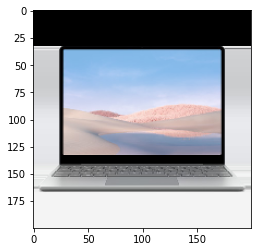

[[0.]]


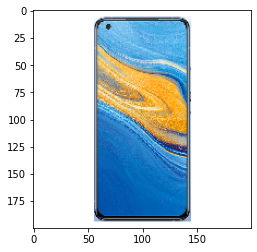

[[1.]]


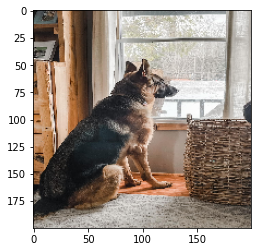

[[1.]]


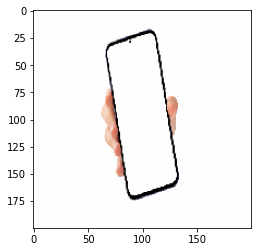

[[1.]]


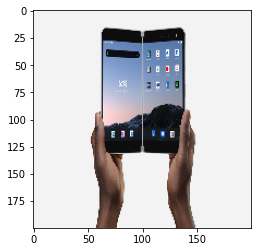

[[1.]]


In [15]:
dir_path = 'imagedata/testing/'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    IA = image.img_to_array(img)
    IA = np.expand_dims(IA,axis=0)
    testimg = np.vstack([IA])
    ans = model.predict(testimg)
    print(ans)